In [2]:
import networkx as nx
import itertools

def generate_unique_pairs(container: list[str], ignore: list[tuple[str, str]] = None) -> list[str]:
    if ignore == None:
        ignore = list()
    upairs = list()
    for (a, b) in itertools.permutations(container, 2):
        if ((b, a) not in upairs) & ((a, b) not in ignore) & ((b, a) not in ignore):
            upairs.append((a, b))
    return upairs

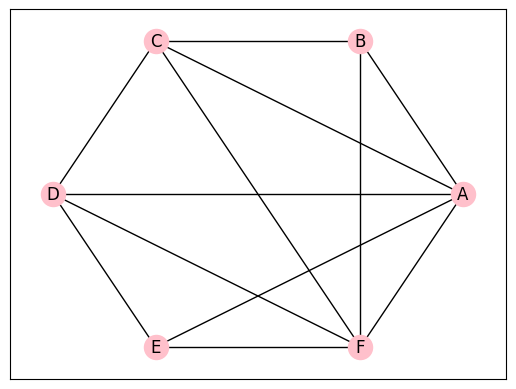

In [16]:
edges = generate_unique_pairs(["A", "B", "C", "D", "E", "F"], ignore = [("B", "E"), ("B", "D"), ("C", "E")])
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.circular_layout(graph)
nx.draw_networkx(graph, node_color = "pink", pos = pos)

In [17]:
# F's lcc? 
# 5 node friends
# 5*4/2 node friend pairs = 10

# of them 7 pairs are connected

nx.clustering(graph, "F")

0.7

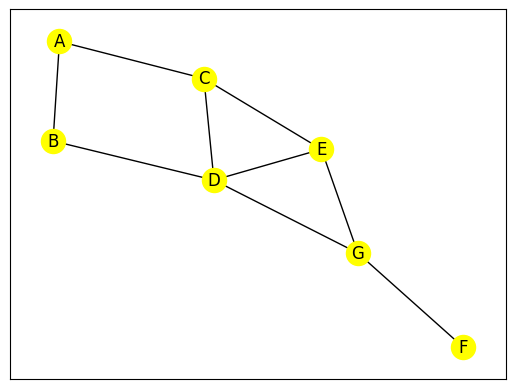

In [22]:
graph = nx.Graph()
graph.add_edges_from([("A", "C"), ("A", "B"), ("B", "D"), ("C", "E"), ("C", "D"), ("E", "D"), ("D", "G"), ("E", "G"), ("G", "F")])
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, node_color = "yellow", pos = pos)

In [23]:
# diameter? 5

nx.diameter(graph)

4

In [24]:
nx.eccentricity(graph)

{'A': 4, 'C': 3, 'B': 3, 'D': 2, 'E': 2, 'G': 3, 'F': 4}

In [25]:
nx.radius(graph)

2

In [26]:
nx.minimum_node_cut(graph)

{'G'}

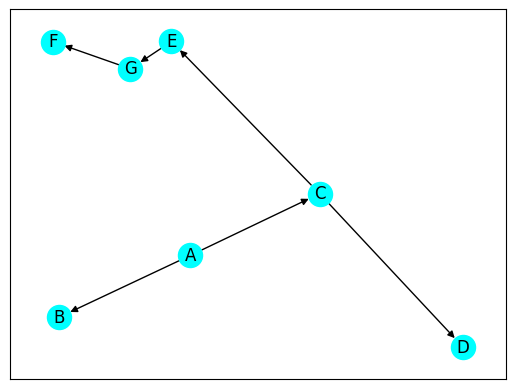

In [30]:
nx.draw_networkx(nx.bfs_tree(graph, "A"), node_color = "cyan")

In [31]:
nx.center(graph)

['D', 'E']

In [32]:
nx.periphery(graph)

['A', 'F']

In [33]:
nx.eccentricity(graph, "B") == nx.eccentricity(graph, "C")

True

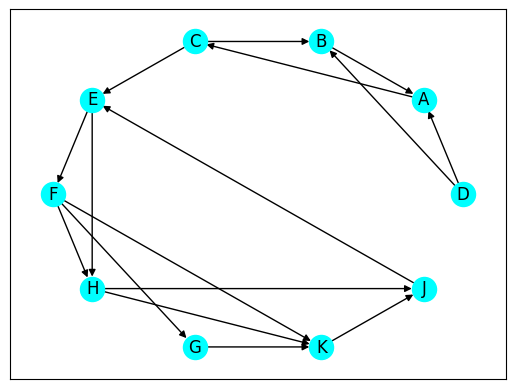

In [46]:
graph = nx.DiGraph()
graph.add_edges_from([("D", "A"), ("D", "B"), ("B", "A"), ("A", "C"), ("C", "B"), ("C", "E"), ("E", "F"), ("E", "H"),
                     ("F", "H"), ("F", "G"), ("F", "K"), ("G", "K"), ("K", "J"), ("H", "J"), ("J", "E"), ("H", "K")])
pos = nx.circular_layout(graph)
nx.draw_networkx(graph, node_color = "cyan", pos = pos)

In [47]:
list(nx.all_simple_paths(graph, "D", "K"))

[['D', 'A', 'C', 'E', 'F', 'H', 'K'],
 ['D', 'A', 'C', 'E', 'F', 'G', 'K'],
 ['D', 'A', 'C', 'E', 'F', 'K'],
 ['D', 'A', 'C', 'E', 'H', 'K'],
 ['D', 'B', 'A', 'C', 'E', 'F', 'H', 'K'],
 ['D', 'B', 'A', 'C', 'E', 'F', 'G', 'K'],
 ['D', 'B', 'A', 'C', 'E', 'F', 'K'],
 ['D', 'B', 'A', 'C', 'E', 'H', 'K']]